## Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Import Dataset

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(trainX, trainy), (testX, testy) = mnist.load_data()

print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [4]:
trainy[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

3


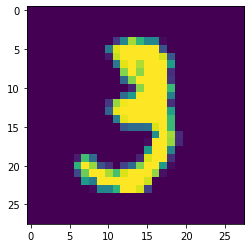

In [5]:
print(trainy[10])
plt.imshow(trainX[10])

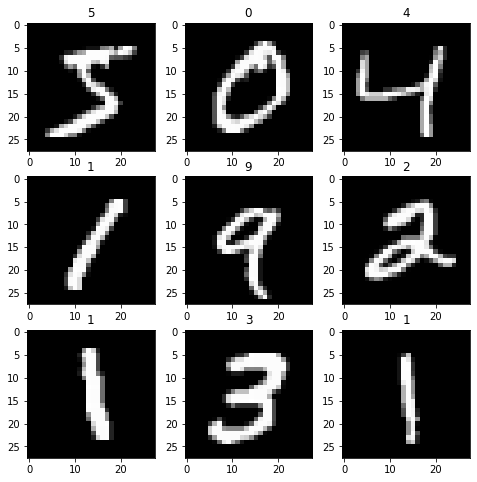

In [6]:
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(330+1+i)
    plt.imshow(trainX[i],cmap='gray')
    plt.title(trainy[i])
plt.show()

In [7]:
trainX.shape

(60000, 28, 28)

In [8]:
trainX.shape[0]

60000

## Reshape the data

In [9]:
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

print(trainX.shape)
print(testX.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## Categorical data

In [10]:
# Check the data: train :Y
trainy[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
trainY_categorical = to_categorical(trainy)
testY_categorical = to_categorical(testy)

In [13]:
trainY_categorical[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## Normalize the data

In [14]:
trainX.dtype

dtype('uint8')

In [15]:
trainX_normalize=trainX.astype('float32')
testX_normalize=testX.astype('float32')

In [16]:
trainX_normalize=trainX_normalize/255.0
testX_normalize=testX_normalize/255.0

In [40]:
a=170711310215215151521015214541514
b=170700052121521541545465651651511
print(a*b)

29140429551470459132424319145235437873357632516473743976770327654


In [46]:
a=np.array([[1,2,3],
           [4,5,6],
           [7,8,9]])

b=np.array([[10,11,12],
           [13,14,15],
           [16,17,18]])

In [47]:
a*b

array([[ 10,  22,  36],
       [ 52,  70,  90],
       [112, 136, 162]])

In [48]:
V=[21,21,54,12,154,54,12,14]

In [49]:
np.argmax(V)

4

In [50]:
a=[0,1,2,3,4,5,6,7,8,9]

## Define CNN Architecture

In [17]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential

In [18]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [19]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

## Train the model

In [21]:
history=model.fit(trainX_normalize,trainY_categorical,
                  epochs=10,batch_size=32,
                  validation_data=(testX_normalize,testY_categorical))

Epoch 1/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1323 - accuracy: 0.9590 - val_loss: 0.0432 - val_accuracy: 0.9852
Epoch 2/10
1875/1875 [==============================] - 40s 22ms/step - loss: 0.0441 - accuracy: 0.9862 - val_loss: 0.0310 - val_accuracy: 0.9892
Epoch 3/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0281 - accuracy: 0.9908 - val_loss: 0.0491 - val_accuracy: 0.9860
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0220 - accuracy: 0.9926 - val_loss: 0.0445 - val_accuracy: 0.9864
Epoch 5/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0164 - accuracy: 0.9949 - val_loss: 0.0345 - val_accuracy: 0.9882
Epoch 6/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0125 - accuracy: 0.9959 - val_loss: 0.0369 - val_accuracy: 0.9889
Epoch 7/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0096 - accuracy: 0.9966 - val_loss: 0.0365 -

## Evaludate the model

In [22]:
test_loss,test_score=model.evaluate(testX_normalize,testY_categorical)

313/313 [==============================] - 1s 4ms/step - loss: 0.0532 - accuracy: 0.9884


In [23]:
print('Model Accuracy: ',test_score*100)

Model Accuracy:  98.83999824523926


## Plot Accuracy and Loss Graph

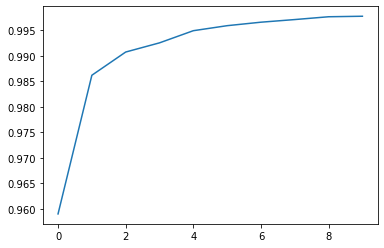

In [24]:
plt.plot(history.history['accuracy'])

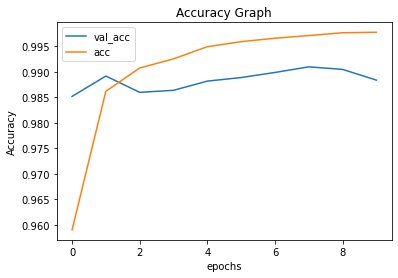

In [32]:
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.plot(history.history['accuracy'],label='acc')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')
plt.legend()

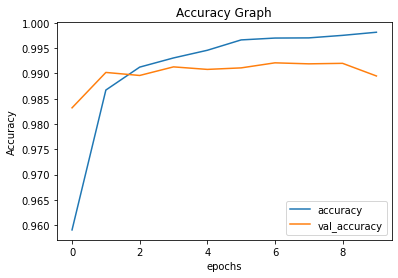

In [47]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.show()

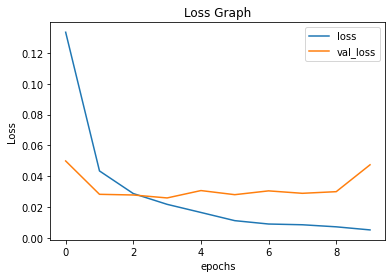

In [48]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

## Save Model

In [49]:
import time
t=time.time()
print(t)

1616602237.0469248


In [58]:
model_name='MNIST_CNN_'+str(int(t))+'.h5'
model_name

'MNIST_CNN_1616602237.h5'

In [59]:
model.save(model_name)

## Load Model

In [61]:
from tensorflow.keras.models import load_model


In [63]:
new_model=load_model(model_name)
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

## Experiment of Matplotlib

In [36]:
x=[10,20,30,40,50,60]
y=[105,115,125,135,145,155]

Text(0.5, 1.0, 'X vs Y')

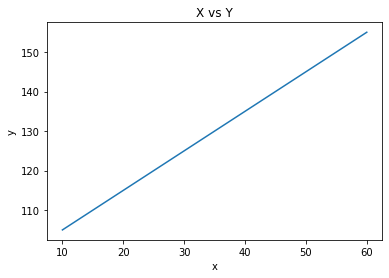

In [41]:
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('X vs Y')